In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

import warnings
import pickle

from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("diabetes.csv")

# Data Analysis and Wrangling

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
print(data.columns)
data.shape

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


(768, 9)

In [6]:
data.isnull().sum()
a = len(data.loc[data['Insulin']==0])
a

374

In [7]:
columns_name = data.columns
for ele in columns_name:
    if 0 in data[ele].unique():
        print(ele,":","True")

Pregnancies : True
Glucose : True
BloodPressure : True
SkinThickness : True
Insulin : True
BMI : True
Outcome : True


In [8]:
for ele in columns_name:
    if ele!="Pregnancies" and ele!="Outcome":
        data[ele].replace(0, np.nan, inplace=True)

In [9]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [11]:
for ele in columns_name:
    data[ele].fillna(value=data[ele].mean(), inplace=True)

In [12]:
data["Age"].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

In [13]:
# import matplotlib.pyplot as plt

# fig = plt.figure()
# ax = fig.add_subplot(111)
# data["Glucose"].plot(kind = "kde", ax = ax)

# line, labels = ax.get_legend_handles_labels()
# ax.legend(line,labels,loc = "best")

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [15]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [16]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data visualisation

         Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
Outcome                                                                     
0                500      500            500            500      500  500   
1                268      268            268            268      268  268   

         DiabetesPedigreeFunction  Age  
Outcome                                 
0                             500  500  
1                             268  268  


<AxesSubplot:xlabel='Outcome', ylabel='count'>

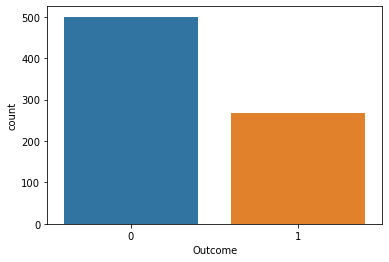

In [17]:
print(data.groupby(["Outcome"]).count())
sns.countplot(data["Outcome"])

# 0=No diabeties, 1=Diabeties

0    500
1    268
Name: Outcome, dtype: int64


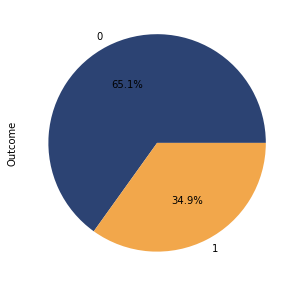

In [18]:
data['Outcome'].value_counts().plot(kind='pie',colors=['#2C4373', '#F2A74B'],autopct='%1.1f%%',figsize=(5,5))
plt.show
varValue = data.Outcome.value_counts()
print(varValue)

#### Our dataset does not seem too balance. Let's balance it with Upsampling method

In [19]:
from sklearn.utils import resample

df_majority = data.loc[data.Outcome == 0].copy()
df_minority = data.loc[data.Outcome == 1].copy()
df_minority_upsampled = resample(df_minority,
                             replace=True,  # sample with replacement
                            n_samples=500,  # to match majority class
                            random_state=123) 
data = pd.concat([df_majority, df_minority_upsampled])

1    500
0    500
Name: Outcome, dtype: int64


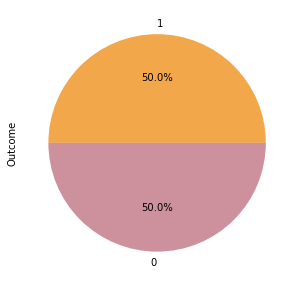

In [20]:
data['Outcome'].value_counts().plot(kind='pie',colors=['#F2A74B', '#cd919e'],autopct='%1.1f%%',figsize=(5,5))
plt.show
varValue = data.Outcome.value_counts()
print(varValue)

#### Now our data set look balanced

## Outlier Detection

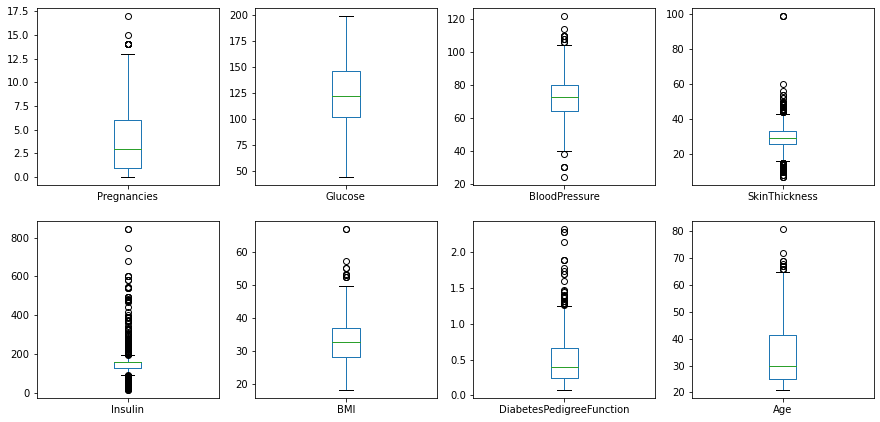

In [21]:
data1=data.drop('Outcome',axis=1)
data1.plot(kind='box', subplots=True, layout=(4,4), sharex=False,sharey=False ,figsize =(15,15))
plt.show()

#### So we can see we have outliers in our data.

### Outlier removal
    1. Isolation Forest
    2. Interquantile Range(IQR)

## Isolation Forest

In [22]:
from sklearn.ensemble import IsolationForest
from collections import Counter
rs=np.random.RandomState(0)
clf = IsolationForest(max_samples=100,random_state=rs, contamination=.1) 
clf.fit(data)
y_pred_train = clf.predict(data)
sayı = Counter(y_pred_train)
print(sayı)

## -1 = Outliers

Counter({1: 900, -1: 100})


## Interquartile Range (IQR)

In [23]:
from collections import Counter
def detect_outliers(data,features):
    outlier_indices = []
    for c in features:
        # 1st quartile
        Q1 = np.percentile(data[c],25)
        # 3rd quartile
        Q3 = np.percentile(data[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = data[(data[c] < Q1 - outlier_step) | (data[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)

    print(multiple_outliers)
    return multiple_outliers

In [24]:
data.loc[detect_outliers(data,['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])]

[298, 125, 177, 43, 254, 293, 595, 693, 458, 16, 39, 409, 579, 370, 323, 659, 220, 31, 6, 402, 715, 359, 195, 425, 109, 748, 655, 584, 485, 618, 661, 45, 243]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
298,14,100.0,78.0,25.0,184.000000,36.6,0.412,46,1
298,14,100.0,78.0,25.0,184.000000,36.6,0.412,46,1
298,14,100.0,78.0,25.0,184.000000,36.6,0.412,46,1
298,14,100.0,78.0,25.0,184.000000,36.6,0.412,46,1
298,14,100.0,78.0,25.0,184.000000,36.6,0.412,46,1
...,...,...,...,...,...,...,...,...,...
45,0,180.0,66.0,39.0,155.548223,42.0,1.893,25,1
45,0,180.0,66.0,39.0,155.548223,42.0,1.893,25,1
243,6,119.0,50.0,22.0,176.000000,27.1,1.318,33,1
243,6,119.0,50.0,22.0,176.000000,27.1,1.318,33,1


#### We drop the rows with outliers.

In [25]:
data.drop([298, 125, 177, 43, 254, 293, 595, 693, 458, 16, 39, 409, 
                  579, 370, 323, 659, 220, 31, 6, 402, 715, 359, 195, 425, 109,
                  748, 655, 584, 485, 618, 661, 45, 243], axis=0,inplace=True)

In [26]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85.0,66.000000,29.00000,155.548223,26.6,0.351,31,0
3,1,89.0,66.000000,23.00000,94.000000,28.1,0.167,21,0
5,5,116.0,74.000000,29.15342,155.548223,25.6,0.201,30,0
7,10,115.0,72.405184,29.15342,155.548223,35.3,0.134,29,0
10,4,110.0,92.000000,29.15342,155.548223,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
23,9,119.0,80.000000,35.00000,155.548223,29.0,0.263,29,1
429,1,95.0,82.000000,25.00000,180.000000,35.0,0.233,43,1
701,6,125.0,78.000000,31.00000,155.548223,27.6,0.565,49,1
476,2,105.0,80.000000,45.00000,191.000000,33.7,0.711,29,1


## Feature Selection

<AxesSubplot:>

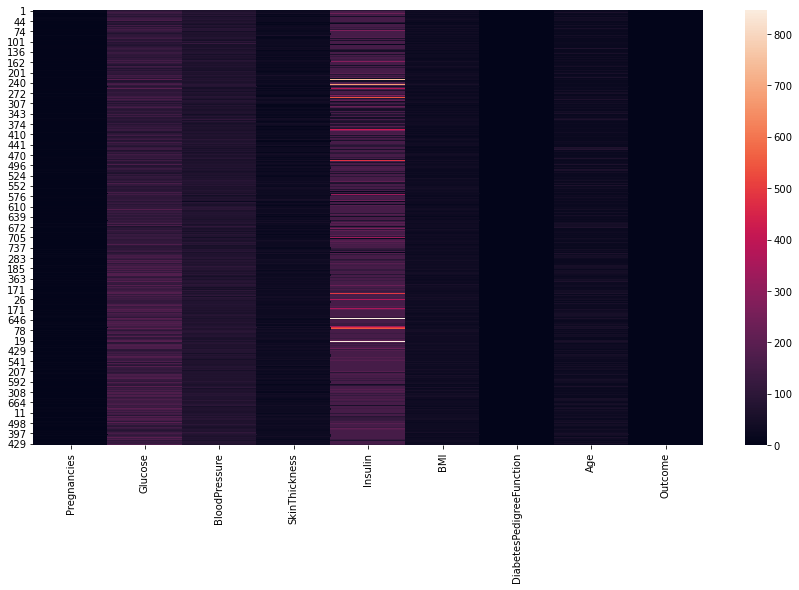

In [27]:
plt.figure(figsize=(15,8))
sns.heatmap(data)

In [28]:
#sns.pairplot(data, hue="Outcome")

# Correlation

In [29]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.178360,0.199785,0.128452,0.070766,0.015201,-0.032845,0.548718,0.251401
Glucose,0.178360,1.000000,0.213761,0.124677,0.360362,0.166747,0.056242,0.319257,0.496471
BloodPressure,0.199785,0.213761,1.000000,0.177206,0.061209,0.291774,-0.023298,0.314629,0.155649
SkinThickness,0.128452,0.124677,0.177206,1.000000,0.137877,0.506105,0.050613,0.100409,0.176342
Insulin,0.070766,0.360362,0.061209,0.137877,1.000000,0.136038,0.067282,0.185135,0.153696
BMI,0.015201,0.166747,0.291774,0.506105,0.136038,1.000000,0.145763,-0.002788,0.279206
DiabetesPedigreeFunction,-0.032845,0.056242,-0.023298,0.050613,0.067282,0.145763,1.000000,0.017431,0.109439
Age,0.548718,0.319257,0.314629,0.100409,0.185135,-0.002788,0.017431,1.000000,0.251080
Outcome,0.251401,0.496471,0.155649,0.176342,0.153696,0.279206,0.109439,0.251080,1.000000


<AxesSubplot:>

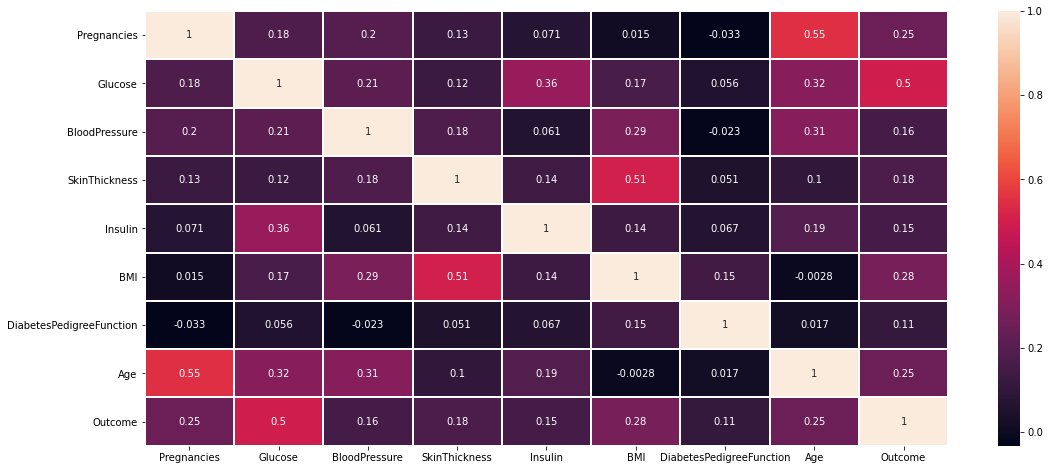

In [30]:
plt.figure(figsize=(18,8))
sns.heatmap(data.corr(), annot=True, linewidths=1)

<AxesSubplot:>

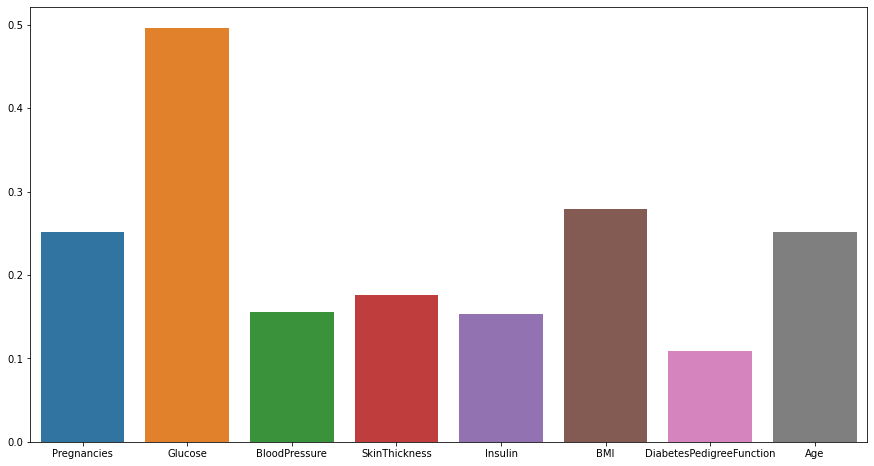

In [31]:
data_2 = data.drop(["Outcome"],axis=1)
plt.figure(figsize=(15,8))
sns.barplot(data_2.corrwith(data.Outcome).index, data_2.corrwith(data.Outcome))

In [32]:
data.drop(['BloodPressure', 'SkinThickness', 'Insulin','DiabetesPedigreeFunction'],axis=1,inplace=True)
data

,Pregnancies,Glucose,BMI,Age,Outcome
1,1,85.0,26.6,31,0
3,1,89.0,28.1,21,0
5,5,116.0,25.6,30,0
7,10,115.0,35.3,29,0
10,4,110.0,37.6,30,0
...,...,...,...,...,...
23,9,119.0,29.0,29,1
429,1,95.0,35.0,43,1
701,6,125.0,27.6,49,1
476,2,105.0,33.7,29,1


# Normalization

In [33]:

X = data.iloc[:, 0:4]
Y = data.iloc[:, 4]


# Train_Test_Splitting

In [34]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state=42)
x_train

,Pregnancies,Glucose,BMI,Age
658,11,127.0,39.0,51
555,7,124.0,25.5,37
550,1,116.0,27.4,21
133,8,84.0,38.3,39
635,13,104.0,31.2,38
...,...,...,...,...
163,2,100.0,29.7,21
437,5,147.0,29.9,28
84,5,137.0,48.8,37
660,10,162.0,27.7,54


# Training and Testing the Model

# 1. Logistic Regrassion

In [35]:
# Non standardize data
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
log_predict1 = log_reg.predict(x_test)
print("Accuracy of Non standardize data in Logistic regrassion:",accuracy_score(y_test,log_predict1)*100)

Accuracy of Non standardize data in Logistic regrassion: 70.2247191011236


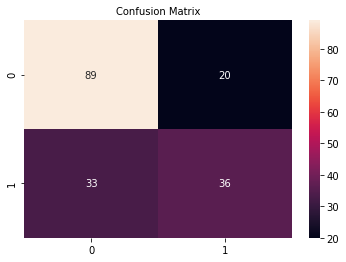

In [36]:
confu_matrix = confusion_matrix(y_test, log_predict1)
plt.title("Confusion Matrix", fontsize=10)
sns.heatmap(confu_matrix, annot=True)
plt.show()

# 2. Decission Tree

In [37]:
# Non standardize data
d_tree = DecisionTreeClassifier(random_state=42)
d_tree.fit(x_train,y_train)
d_predict1 = d_tree.predict(x_test)
print("Accuracy of Non standardize data in Deccission Tree Classifier:",accuracy_score(y_test,d_predict1)*100)

Accuracy of Non standardize data in Deccission Tree Classifier: 81.46067415730337


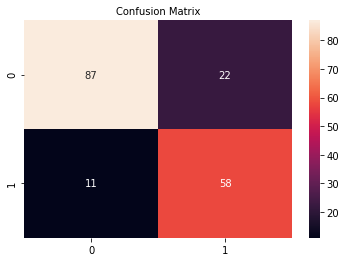

In [38]:
confu_matrix = confusion_matrix(y_test, d_predict1)
plt.title("Confusion Matrix", fontsize=10)
sns.heatmap(confu_matrix, annot=True)
plt.show()

# 3. Random Forest

In [39]:
# Non standardize data
r_forest = RandomForestClassifier(n_estimators=100, random_state=42)
r_forest.fit(x_train,y_train)
r_predict1 = r_forest.predict(x_test)
print("Accuracy of Non standardize data in Random Forest Classifier:",accuracy_score(y_test,r_predict1)*100)

Accuracy of Non standardize data in Random Forest Classifier: 88.20224719101124


# Confusion Matrix


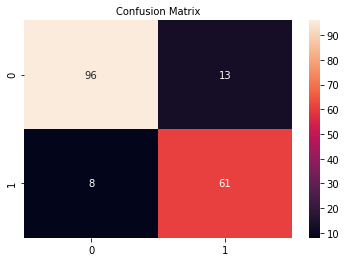

In [40]:
confu_matrix = confusion_matrix(y_test, r_predict1)
plt.title("Confusion Matrix", fontsize=10)
sns.heatmap(confu_matrix, annot=True)
plt.show()

In [41]:

# save model
pickle.dump(r_forest,open('model.pkl','wb'))

# Load Model
dp = pickle.load(open('model.pkl','rb'))

y_predict = dp.predict(x_test)

print("confusion matrix: \n", confusion_matrix(y_test,y_predict))
accuracy_score(y_test,y_predict)

confusion matrix: 
 [[96 13]
 [ 8 61]]


0.8820224719101124